In [1]:
!!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!cd /content

In [2]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.48G/1.49G [00:33<00:00, 75.6MB/s]
100% 1.49G/1.49G [00:33<00:00, 48.1MB/s]


In [3]:
!mkdir /content/data

In [4]:
!unzip /content/100-bird-species.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train/VERMILION FLYCATHER/102.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/103.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/104.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/105.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/106.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/107.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/108.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/109.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/110.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/111.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/112.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/113.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/114.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/115.jpg  
  inflating: /content/data/train/VERMILION FLYCATHER/116.jpg  
  in

In [5]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from random import shuffle
import random
import os

In [6]:
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256

IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [16]:
test_birds=os.listdir("/content/data/test")
len(test_birds)
#print(train_birds[:200])

400

In [32]:
train_birds=os.listdir("/content/data/train")

train_data=[]
train_label=[]
l=0

for i in train_birds[:50]:

  for j in os.listdir("/content/data/train/"+str(i)):
    #print(label)
    
        file="/content/data/train/"+str(i)+"/"+j
    #img = cv2.imread(file)
        train_data.append(file)
        train_label.append(i)
   # for i in os.listdir(os.path.join(covid_dir,label)):
  l=l+1
        #num_of_covid+=1
train_df = pd.DataFrame({
    'filename': train_data,
    'category': train_label
})

In [33]:
valid_birds=os.listdir("/content/data/valid")

valid_data=[]
valid_label=[]
l=0

for i in valid_birds[:50]:

  for j in os.listdir("/content/data/valid/"+str(i)):
    #print(label)
    
        file="/content/data/valid/"+str(i)+"/"+j
    #img = cv2.imread(file)
        valid_data.append(file)
        valid_label.append(i)
   # for i in os.listdir(os.path.join(covid_dir,label)):
  l=l+1
        #num_of_covid+=1
len(valid_data)

valid_df = pd.DataFrame({
    'filename': valid_data,
    'category': valid_label
})

In [34]:
test_birds=os.listdir("/content/data/test")

test_data=[]
test_label=[]
l=0

for i in test_birds[:50]:

  for j in os.listdir("/content/data/test/"+str(i)):
    #print(label)
    
        file="/content/data/test/"+str(i)+"/"+j
    #img = cv2.imread(file)
        test_data.append(file)
        test_label.append(i)
   # for i in os.listdir(os.path.join(covid_dir,label)):
  l=l+1
        #num_of_covid+=1
len(test_data)

test_df = pd.DataFrame({
    'filename': test_data,
    'category': test_label
})

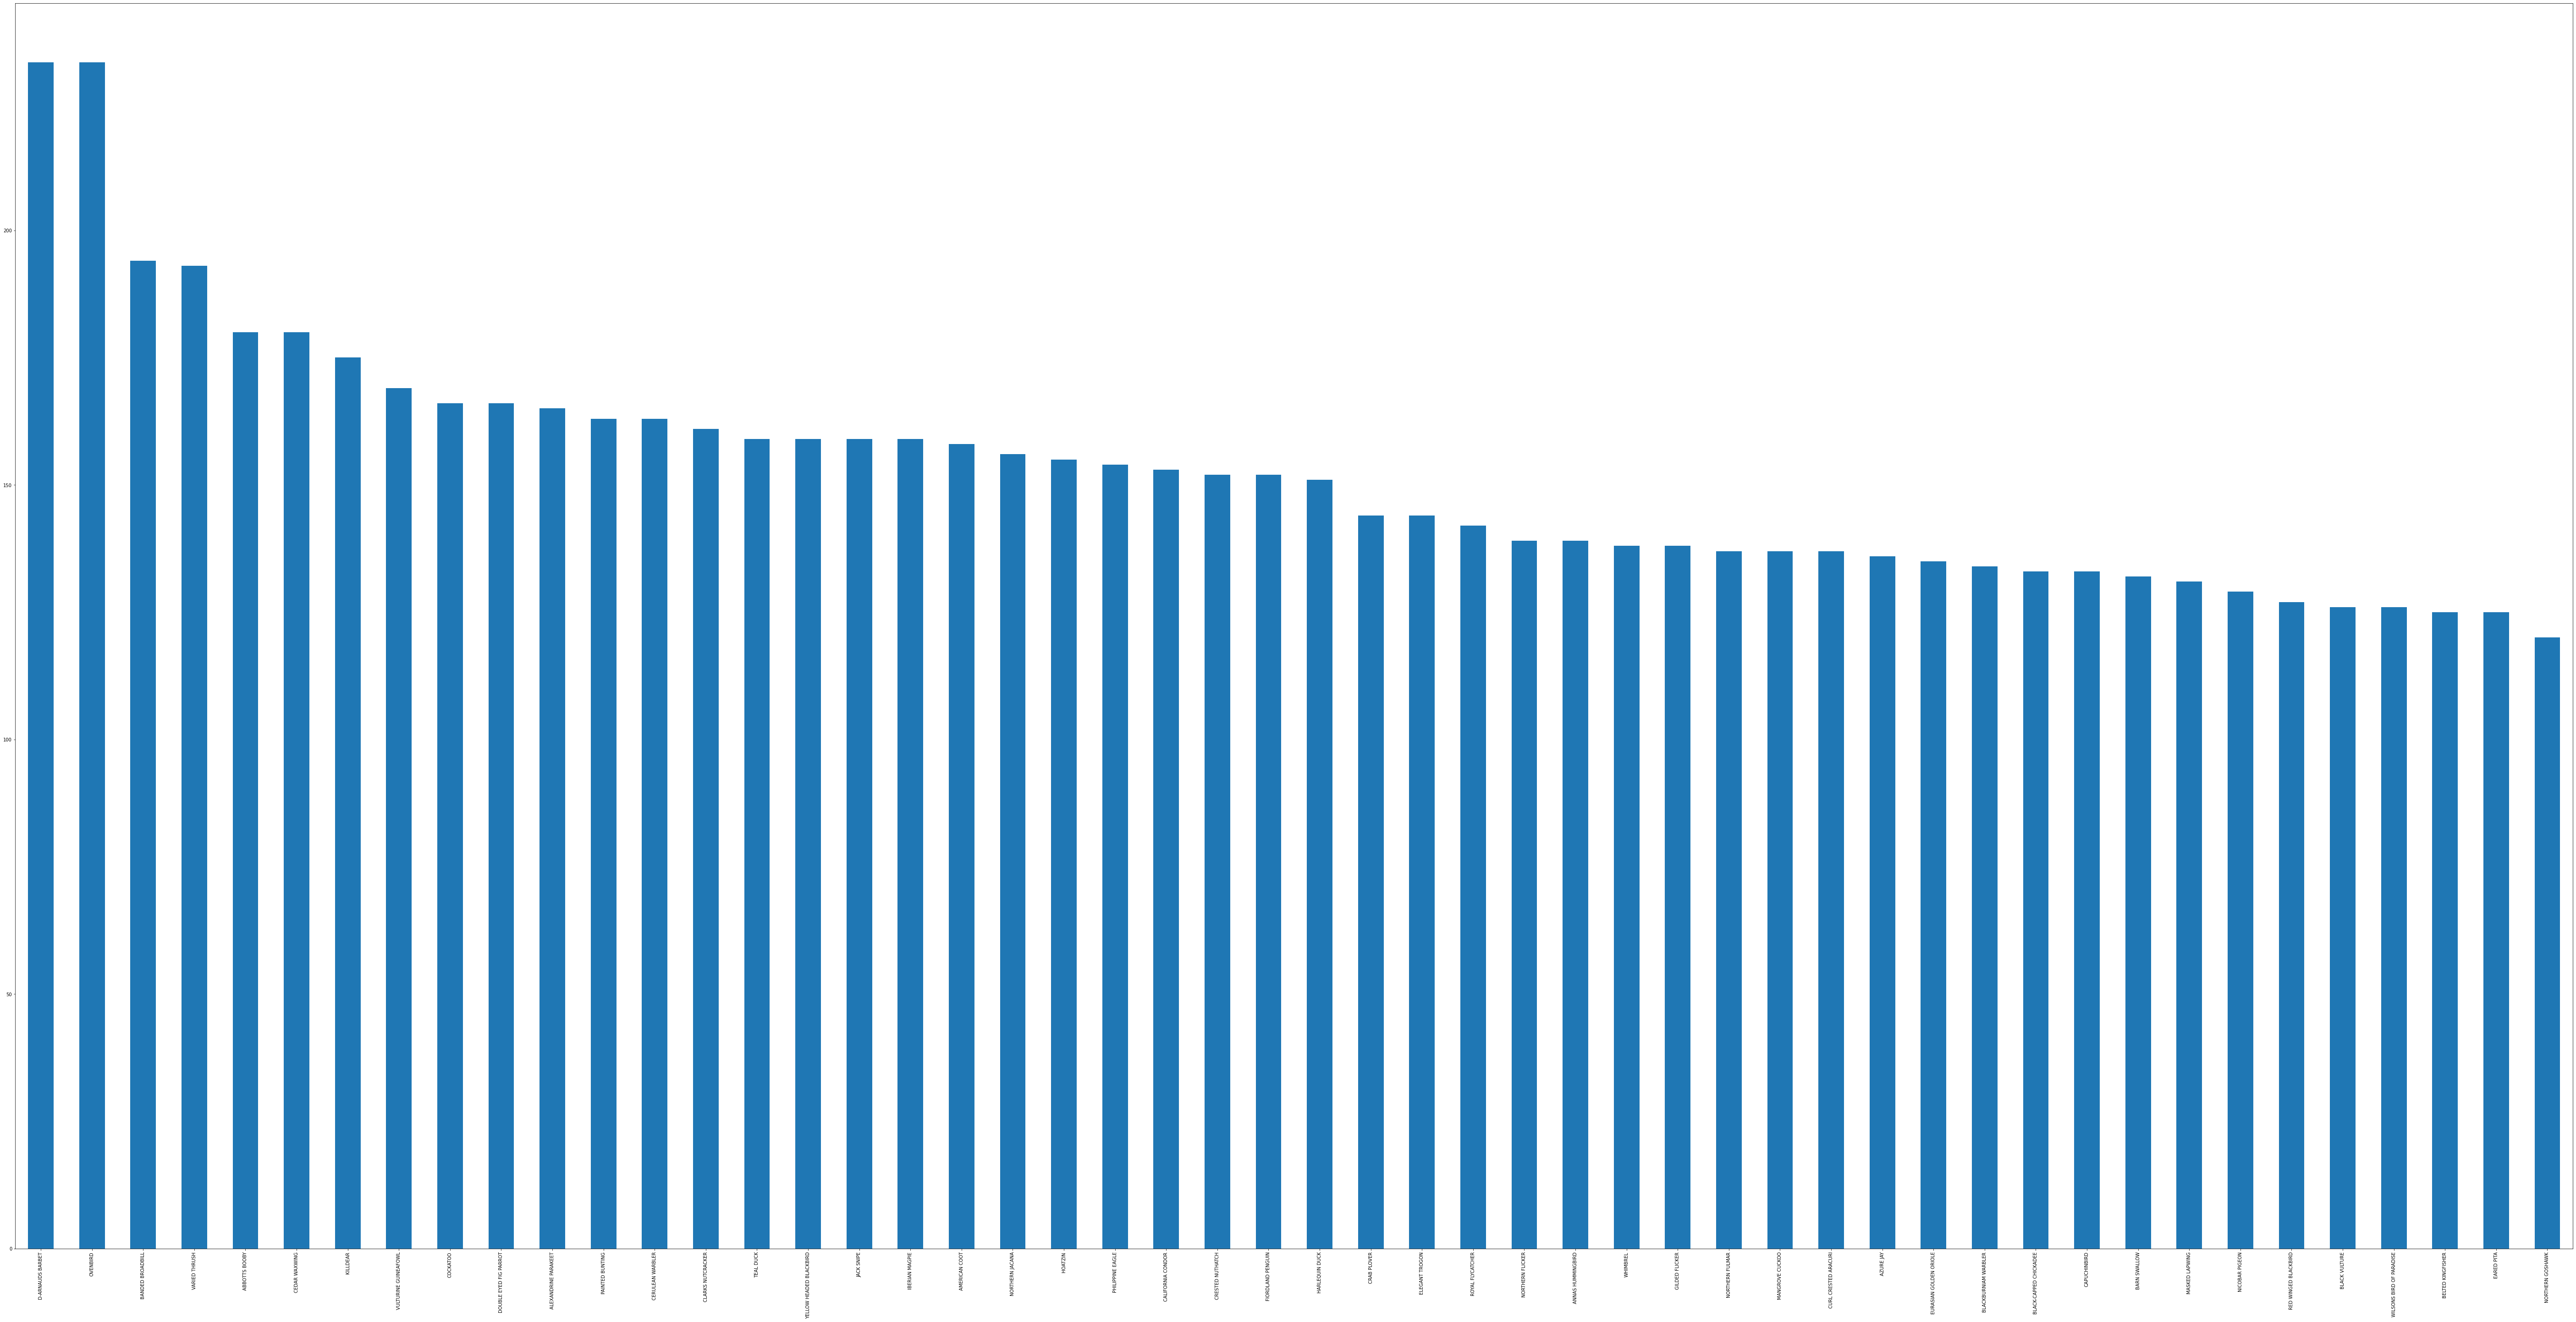

In [35]:
fig = plt.figure(figsize = (100, 50))
train_df['category'].value_counts().plot.bar()

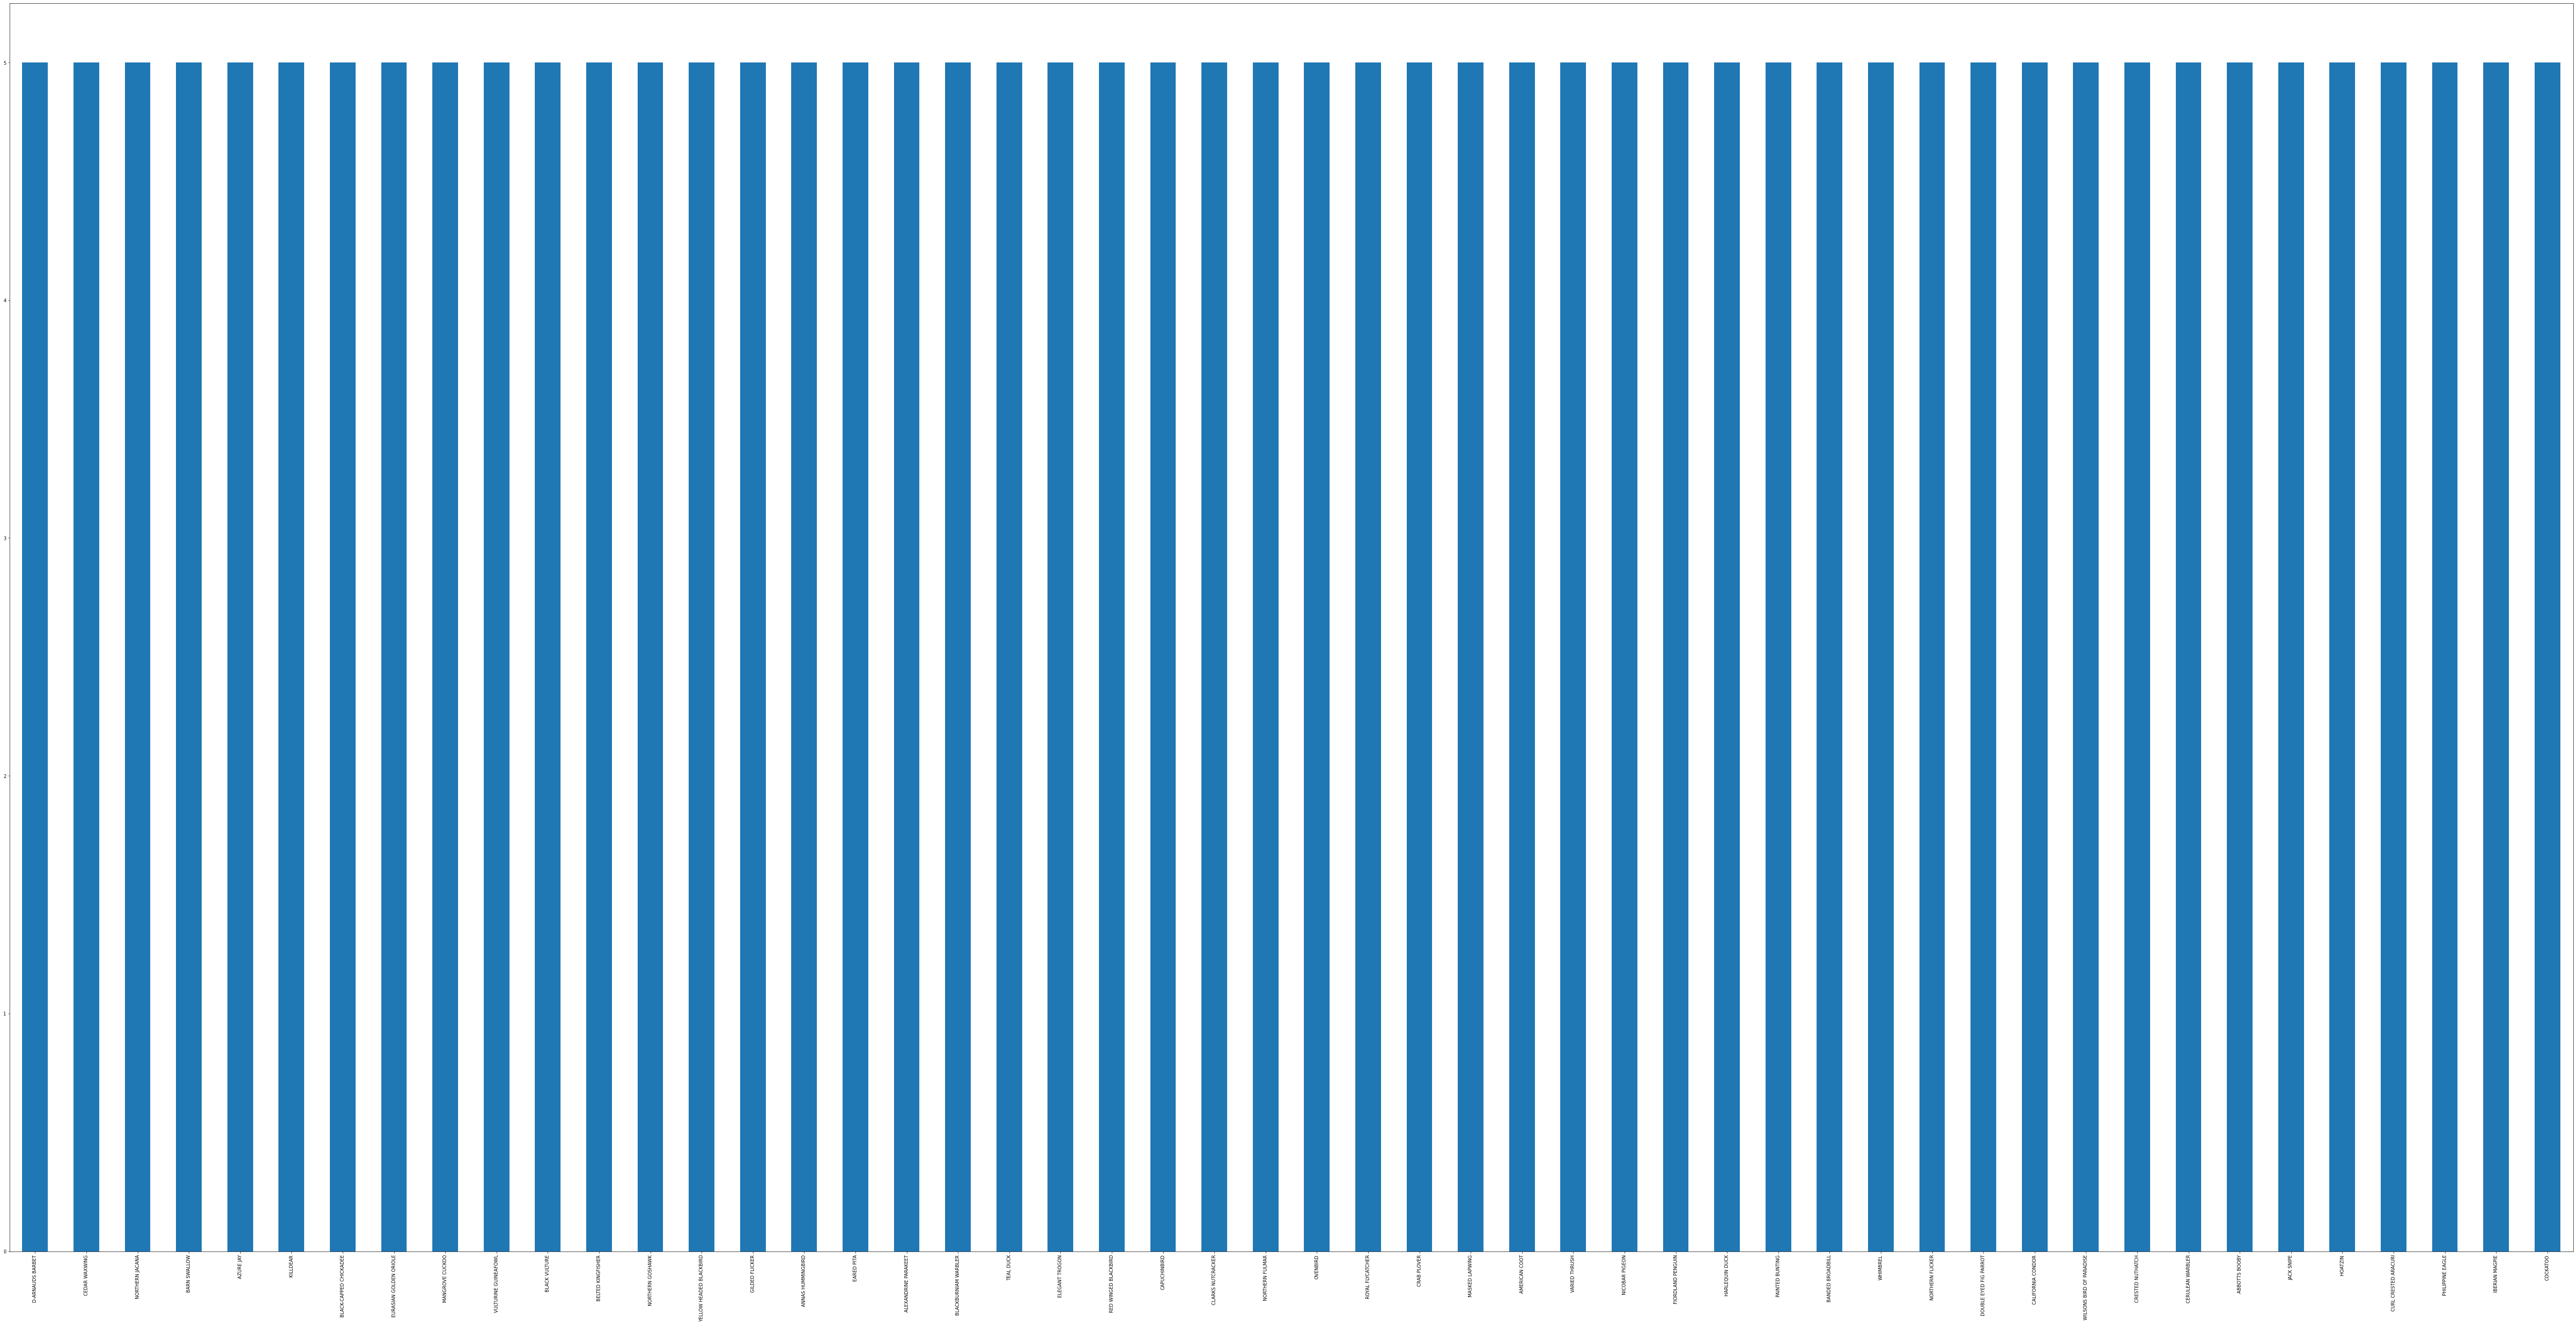

In [36]:
fig = plt.figure(figsize = (100, 50))
valid_df['category'].value_counts().plot.bar()

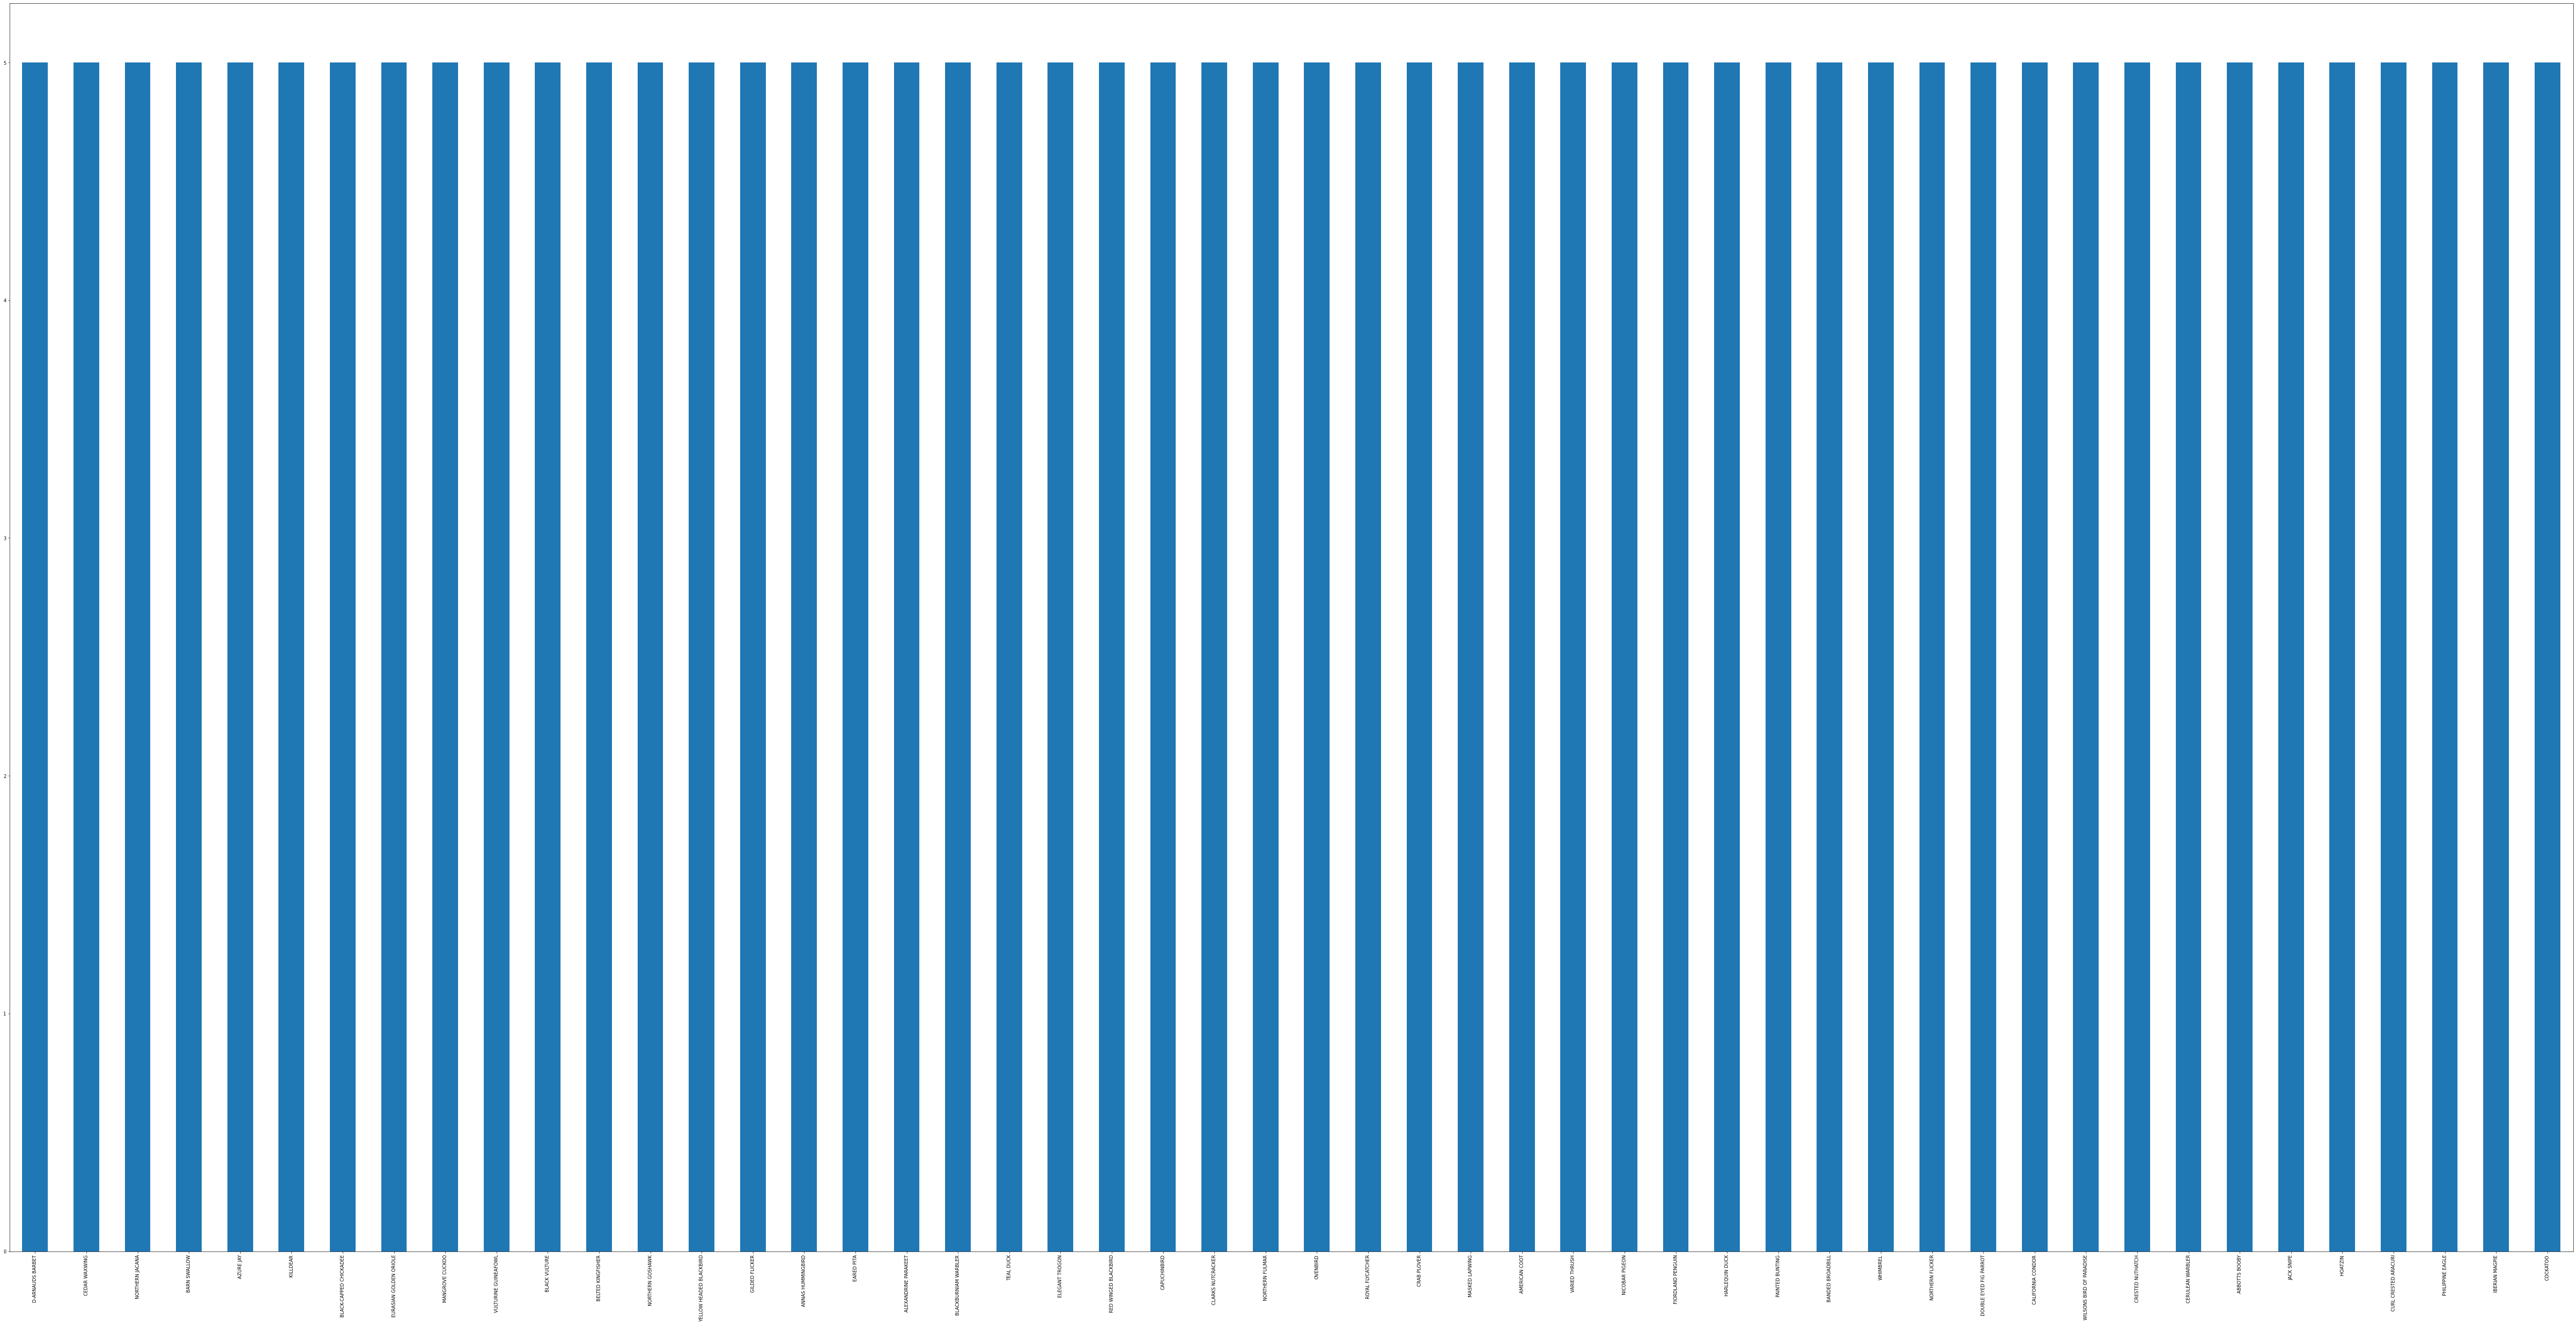

In [37]:
fig = plt.figure(figsize = (100, 50))
test_df['category'].value_counts().plot.bar()

In [38]:
total_train=train_df.shape[0]
total_valid=valid_df.shape[0]
batch_size=5
print(total_train, total_valid)

7615 250


In [39]:
train_datagen = ImageDataGenerator (
    
    rotation_range = 15,
    rescale = 1./255,
    
    shear_range = 0.1,
    zoom_range = 0.2,
    
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_generator = train_datagen.flow_from_dataframe (
    
    train_df, 
    '/content/data/train', 
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 7615 validated image filenames belonging to 50 classes.


In [40]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe (
    
    valid_df, 
    '/content/data/valid', 
    x_col ='filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 250 validated image filenames belonging to 50 classes.


In [41]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe (
    
    example_df, 
    '/content/data/train', 
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical'
)

Found 1 validated image filenames belonging to 1 classes.


                                filename   category
0  /content/data/train/WOOD DUCK/072.jpg  WOOD DUCK


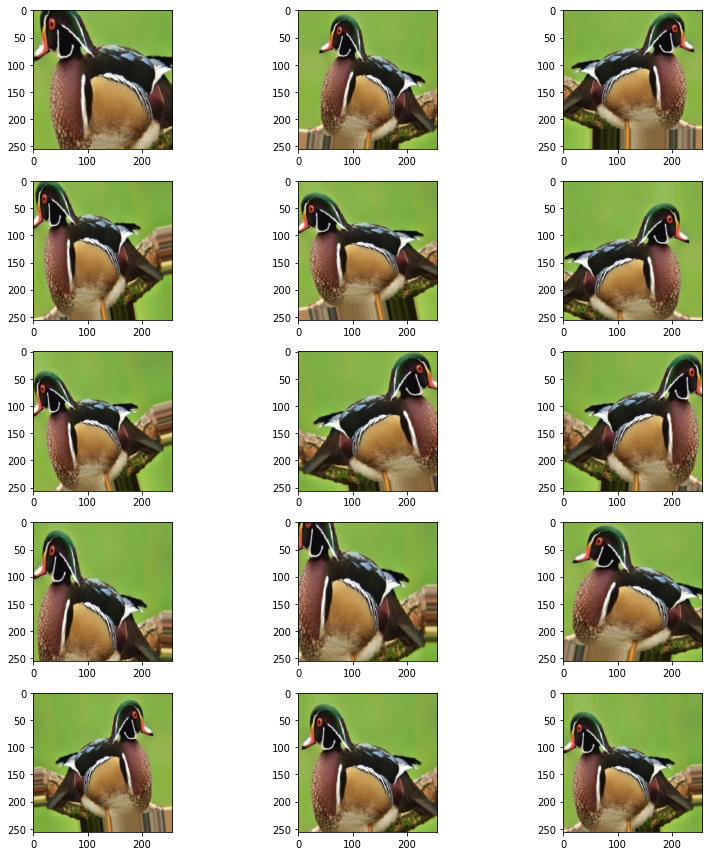

In [25]:
print(example_df)

plt.figure(figsize=(12, 12))

for i in range(0, 15):
    
    plt.subplot(5, 3, i+1)
    
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
        
plt.tight_layout()
plt.show()

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LSTM
import tensorflow as tf
from tensorflow import reshape
from tensorflow.keras.models import Model

from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Reshape

NUM_CLASSES=50

#inn= layers.Input(shape=(380, 380, 3))
#out=EfficientNetB4(include_top=False, weights=None, classes=NUM_CLASSES)(inn)
efnet=EfficientNetB4(weights='imagenet',
                            include_top=False,
                            input_shape=(256, 256, 3))#.layers[342].output

out=efnet.layers[342].output
inn = efnet.input
x = MaxPool2D(pool_size=(2, 2))(out)
x = Reshape((16, 1632))(x)
#out=tf.reshape(out, [1,64,1632]) (out)
l1=LSTM(1632, activation="relu", return_sequences=True, trainable=False)(x)
b1 = BatchNormalization()(l1)
#     x = Dropout(0.5)(x)
    
    # FC layer
f = Flatten(name="flatten")(b1)
d1 = Dense(units=64, activation='relu')(f)
b2 = BatchNormalization()(d1)
#d1=(Dropout(0.5))(l1)
output = Dense(units=50, activation='softmax')(b2)
model = Model(inputs=inn, outputs=output)
opt = RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
#model.compile(optimizer = 'rmsprop',loss = "sparse_categorical_crossentropy" , metrics=['accuracy'])
#model.summary()
#ls=LSTM(128,input_shape = (out2.shape[1:]),activation = 'relu',return_sequences = True)
#drop0 = Dropout(0.2)(ls)

#output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv0)    
#Dense(10,activation = 'softmax'))
#


#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 257, 257, 3)  0           ['normalization[0][0]']      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


                                                                  'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, 64, 64, 32)   4608        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 64, 64, 32)  128         ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 64, 64, 192)  6144        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 64, 64, 192)  768        ['block2b_expand_conv[0][0]']    
 ization) 

In [44]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)


learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', 
                                            patience = 2, 
                                            verbose = 1, 
                                            factor = 0.5, 
                                            min_lr = 0.00001)

import tensorflow as tf
checkpoint_path = "content/train_ckpt/cp.ckpt"
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True, save_weights_only=True, verbose=1)

#cp_callback = tf.keras.callbacks.ModelCheckpoint(
#    filepath=checkpoint_path, 
#    verbose=1, 
#    save_weights_only=True,
#    save_freq=5, save_best_only=True, mode='max')

callbacks = [earlystop,learning_rate_reduction]

In [45]:
epochs = 10
history = model.fit_generator (
    
      train_generator, 
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = total_valid//batch_size,
      steps_per_epoch = total_train//batch_size,
      callbacks = callbacks
  )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


1523/1523 [==============================] - 627s 393ms/step - loss: 2.2379 - accuracy: 0.5287 - val_loss: 2.7373 - val_accuracy: 0.3520 - lr: 1.0000e-04
Epoch 2/10
1523/1523 [==============================] - 596s 391ms/step - loss: 0.9174 - accuracy: 0.8642 - val_loss: 1.6331 - val_accuracy: 0.5880 - lr: 1.0000e-04
Epoch 3/10
1523/1523 [==============================] - 593s 389ms/step - loss: 0.5192 - accuracy: 0.9312 - val_loss: 2.0839 - val_accuracy: 0.4400 - lr: 1.0000e-04
Epoch 4/10
1523/1523 [==============================] - 598s 392ms/step - loss: 0.3386 - accuracy: 0.9530 - val_loss: 0.3128 - val_accuracy: 0.9400 - lr: 1.0000e-04
Epoch 5/10
1523/1523 [==============================] - 595s 391ms/step - loss: 0.2373 - accuracy: 0.9655 - val_loss: 0.6954 - val_accuracy: 0.8240 - lr: 1.0000e-04
Epoch 6/10
1523/1523 [==============================] - ETA: 0s - loss: 0.1686 - accuracy: 0.9758
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1523/1523 [=

In [46]:
model.save("EFNET-LSTTM-Model-{}-{}-{}.h5".format(IMAGE_WIDTH, batch_size, epochs))

In [9]:
from tensorflow import keras
model=keras.models.load_model("/content/COVID-Model-256-5-10.h5")

In [ ]:
accuracy = history.history['accuracy']
print(len(accuracy))
val_accuracy = history.history['val_accuracy']
numEpochs = range(1,  epochs + 1)
plt.plot(numEpochs, accuracy, 'g', label='Training Accuracy')
plt.plot(numEpochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

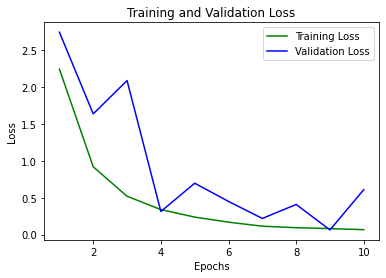

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']
numEpochs = range(1,  epochs + 1)
plt.plot(numEpochs, loss, 'g', label='Training Loss')
plt.plot(numEpochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_dataframe(
    
    test_df, 
    '/content/data/test', 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

Found 250 validated image filenames.


In [51]:
nb_samples = test_df.shape[0]

In [52]:
predict = model.predict_generator(test_generator, steps = np.ceil(nb_samples/batch_size))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [53]:
predict

array([[1.16968113e-06, 4.56585731e-05, 1.10509873e-05, ...,
        3.28316855e-06, 1.04568799e-05, 1.27629755e-05],
       [5.03427582e-05, 4.88198217e-04, 2.15558204e-04, ...,
        2.04452917e-05, 8.32865408e-05, 5.51959201e-05],
       [1.94866680e-05, 4.37182825e-05, 3.62412393e-05, ...,
        1.85025001e-05, 6.91296664e-05, 2.51567417e-06],
       ...,
       [3.45139488e-05, 1.04131608e-03, 1.67558901e-02, ...,
        1.46679324e-03, 4.61881427e-04, 3.20777122e-04],
       [7.23942721e-05, 2.06865408e-02, 2.29864358e-03, ...,
        9.64331775e-05, 8.95226331e-05, 7.56178588e-06],
       [1.62398865e-04, 4.50212974e-03, 9.80458222e-04, ...,
        8.39884524e-05, 3.69152403e-04, 5.14457060e-05]], dtype=float32)

In [54]:
test_df['category'] = np.argmax(predict, axis=-1)
print(predict.shape)

(250, 50)


In [55]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

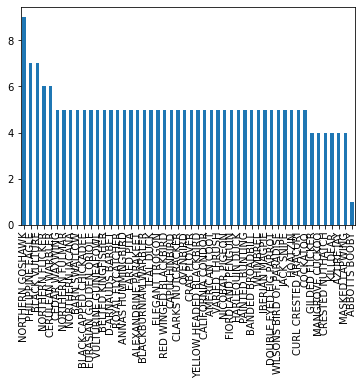

In [56]:
test_df['category'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


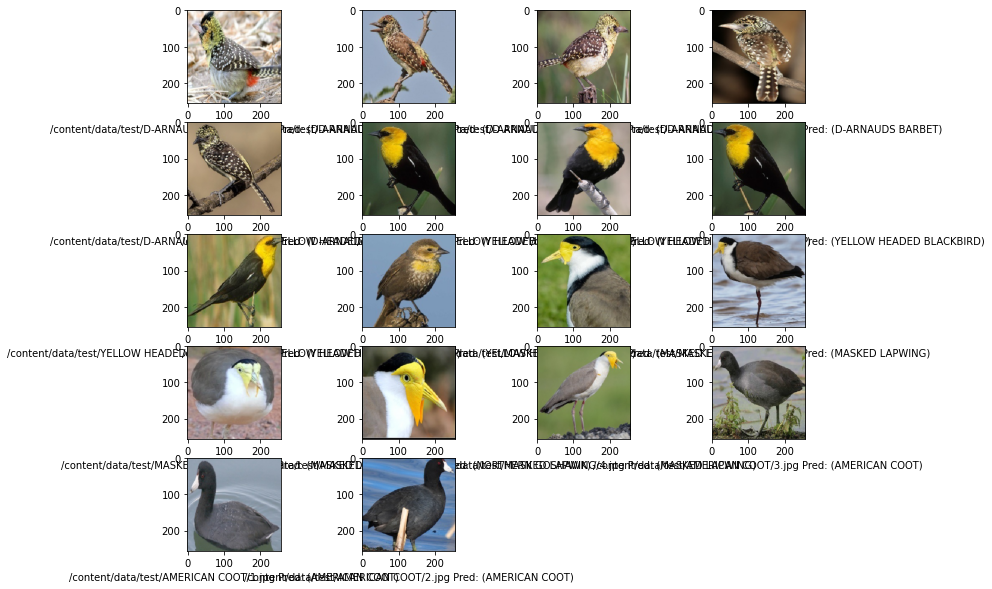

In [63]:
sample_test = test_df.head(18)
sample_test.head()

plt.figure(figsize=(12, 12))

for index, row in sample_test.iterrows():
    
    filename = row['filename']
    category = row['category']
    
    img = load_img(filename, target_size=IMAGE_SIZE)
    
    plt.subplot(6, 4, index+1)
    plt.imshow(img)
    plt.xlabel(filename + ' Pred: (' + "{}".format(category) + ')' )
    
plt.tight_layout()
plt.show()

In [127]:
Truepredict=0
for i in range(len(test_label)):
  if(test_df['category'][i]==test_label[i]):
    Truepredict=Truepredict+1

In [128]:
print(Truepredict)

240


In [129]:
print(classification_report(test_label, test_df['category']))

                          precision    recall  f1-score   support

           ABBOTTS BOOBY       1.00      0.20      0.33         5
    ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
           AMERICAN COOT       1.00      1.00      1.00         5
       ANNAS HUMMINGBIRD       1.00      1.00      1.00         5
               AZURE JAY       1.00      0.80      0.89         5
        BANDED BROADBILL       1.00      1.00      1.00         5
            BARN SWALLOW       1.00      1.00      1.00         5
       BELTED KINGFISHER       1.00      1.00      1.00         5
           BLACK VULTURE       0.71      1.00      0.83         5
  BLACK-CAPPED CHICKADEE       1.00      1.00      1.00         5
    BLACKBURNIAM WARBLER       1.00      1.00      1.00         5
       CALIFORNIA CONDOR       1.00      1.00      1.00         5
            CAPUCHINBIRD       1.00      1.00      1.00         5
           CEDAR WAXWING       1.00      1.00      1.00         5
        C

In [130]:
confusion_matrix(test_label, test_df['category'])

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 5]])

In [135]:
def getModelAccuracy(pred, test_df):
    correctPredictions = 0

    Truepredict=0
    for i in range(len(test_label)):
        if(test_df['category'][i]==test_label[i]):
          Truepredict=Truepredict+1
            
    print('Model Accuracy:',(Truepredict / len(test_df)))
    print('Correct Predictions:', Truepredict, 'Total Predictions:', len(test_df))
    
    return (Truepredict / len(y_test)) * 100

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools
    
#cf = confusion_matrix(actual, pred)

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(500, 500))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
target_names = train_df['category']

#plot_confusion_matrix(cf, target_names)

In [ ]:
cf = confusion_matrix(test_label, test_df['category'])
target_names = train_df['category']
plot_confusion_matrix(cf, target_names)